<a href="https://colab.research.google.com/github/bbastola899/Autonomous-Driving-/blob/main/Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [173]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [174]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [175]:
np.random.seed(0)

In [176]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
print(type(train_data))
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [177]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [178]:
assert(X_train.shape[0]==y_train.shape[0]), 'The number of images are not equal to their labels'
#Checking if there are any erros or the conditon has not met . We can repeat it for test and validation data too. 
assert(X_val.shape[0]==y_val.shape[0]), 'The number of images are not equal to their labels'
assert(X_test.shape[0]==y_test.shape[0]), 'The number of images are not equal to their labels'
assert(X_train.shape[1:]==(32, 32, 3)), 'The dimensions of images are not equal to their labels'
assert(X_val.shape[1:]==(32, 32, 3)), 'The dimensions of images are not equal to their labels'
assert(X_test.shape[1:]==(32, 32, 3)), 'The dimensions of images are not equal to their labels'



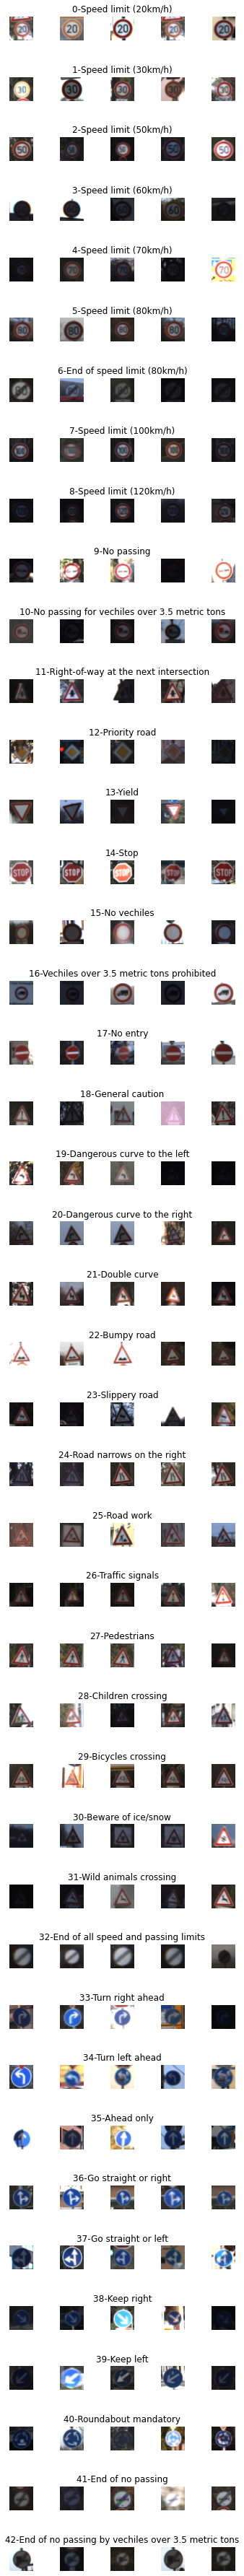

In [179]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected )- 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

In [180]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

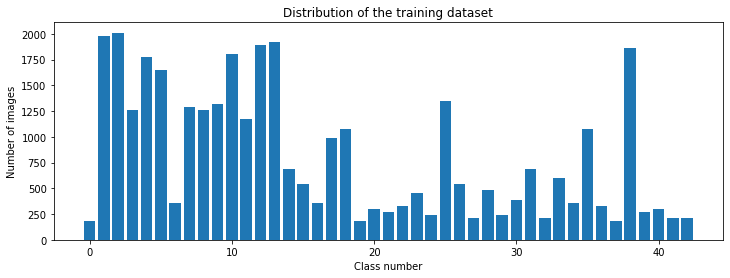

In [181]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


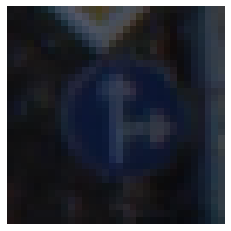

In [182]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


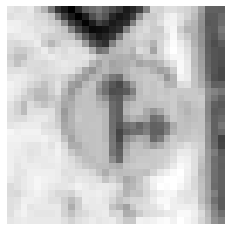

In [183]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = cv2.bitwise_not(grayscale(X_train[1000]))
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)


(32, 32)


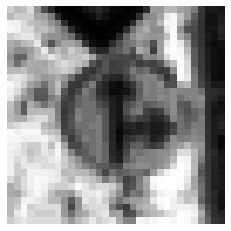

In [184]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

In [185]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))

X_test = np.array(list(map(preprocessing, X_test)))



(34799, 32, 32)


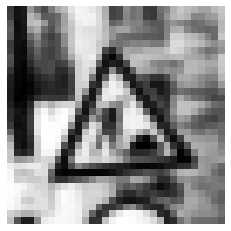

In [186]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap=plt.get_cmap('gray'))
plt.axis("off")
print(X_train.shape)

In [187]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [188]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [189]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [218]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))



  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model



In [219]:
model = modified_model()
print(model.summary())


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_47 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_49 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [220]:
history = model.fit(X_train, y_train, epochs= 10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 [==============================] - 5s 53ms/step - loss: 2.4561 - accuracy: 0.3356 - val_loss: 0.8067 - val_accuracy: 0.7730
Epoch 2/10
87/87 [==============================] - 4s 48ms/step - loss: 0.7242 - accuracy: 0.7753 - val_loss: 0.2809 - val_accuracy: 0.9127
Epoch 3/10
87/87 [==============================] - 4s 47ms/step - loss: 0.4062 - accuracy: 0.8724 - val_loss: 0.1852 - val_accuracy: 0.9429
Epoch 4/10
87/87 [==============================] - 4s 48ms/step - loss: 0.2855 - accuracy: 0.9107 - val_loss: 0.1527 - val_accuracy: 0.9497
Epoch 5/10
87/87 [==============================] - 4s 47ms/step - loss: 0.2310 - accuracy: 0.9294 - val_loss: 0.1006 - val_accuracy: 0.9755
Epoch 6/10
87/87 [==============================] - 4s 48ms/step - loss: 0.1890 - accuracy: 0.9415 - val_loss: 0.1271 - val_accuracy: 0.9599
Epoch 7/10
87/87 [==============================] - 4s 48ms/step - loss: 0.1609 - accuracy: 0.9490 - val_loss: 0.0862 - val_accuracy: 0.9776
Epoch 8/10
87

Text(0.5, 0, 'epoch')

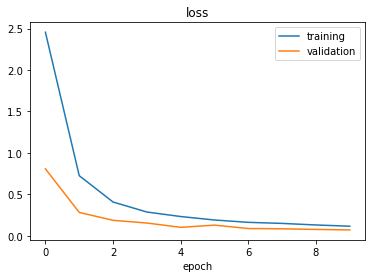

In [221]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

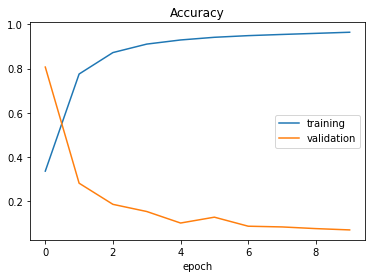

In [222]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [224]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.15437260270118713
Test Accuracy: 0.9568488001823425
